# Metaheuristics libraries in Python

* [PySWARMS](https://pyswarms.readthedocs.io/en/latest/)
* [scikit-opt](https://scikit-opt.github.io/scikit-opt/#/en/README)
* [networkx](https://networkx.org/)
* [ACO-Pants](https://pypi.org/project/ACO-Pants/)
* [Distributed Evolutionary Algorithms in Python - DEAP](https://deap.readthedocs.io/en/master/)
* [OR-Tools](https://developers.google.com/optimization)
* [simanneal](https://github.com/perrygeo/simanneal)
* [Python Genetic Algorithms & Differential Evolution (PyGAD)](https://pygad.readthedocs.io/en/latest/)
* [MEALPY](https://mealpy.readthedocs.io/en/latest/)
* [NSGA-II: Non-dominated Sorting Genetic Algorithm in Pymoo](https://pymoo.org/algorithms/moo/nsga2.html)
* [swarmlib](https://pypi.org/project/swarmlib/)
* [HIVE](https://rwuilbercq.github.io/Hive/)

# Function Optimization

## Pyswarms example
PySwarms is an extensible research toolkit for particle swarm optimization (PSO) in Python

In [1]:
#!pip install pyswarms
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters import plot_cost_history, plot_contour, plot_surface
from pyswarms.utils.plotters.formatters import Mesher, Designer
import matplotlib.pyplot as plt
# Enables us to view it in a Jupyter notebook
from IPython.display import Image

# Set-up POS as an optimizer with 50 particles and predfined parameters
options = {'c1':0.5, 'c2':0.3, 'w':0.9}
optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=2, options=options)

#set-up the function to be optimized and the number of iteration
optimizer.optimize(fx.sphere, iters=100)

2023-02-03 21:03:57,218 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|████████████████████████████████████████████████|100/100, best_cost=3.02e-8
2023-02-03 21:03:57,422 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3.018982297277959e-08, best pos: [-1.44975214e-04  9.57706127e-05]


(3.018982297277959e-08, array([-1.44975214e-04,  9.57706127e-05]))

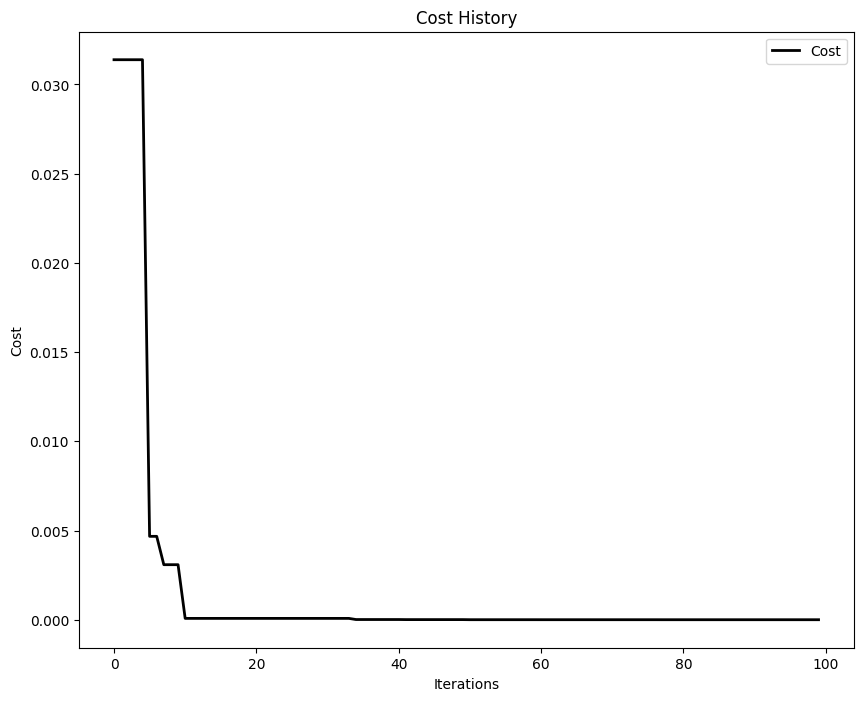

In [2]:
# Plot the cost
plot_cost_history(optimizer.cost_history)
plt.show()

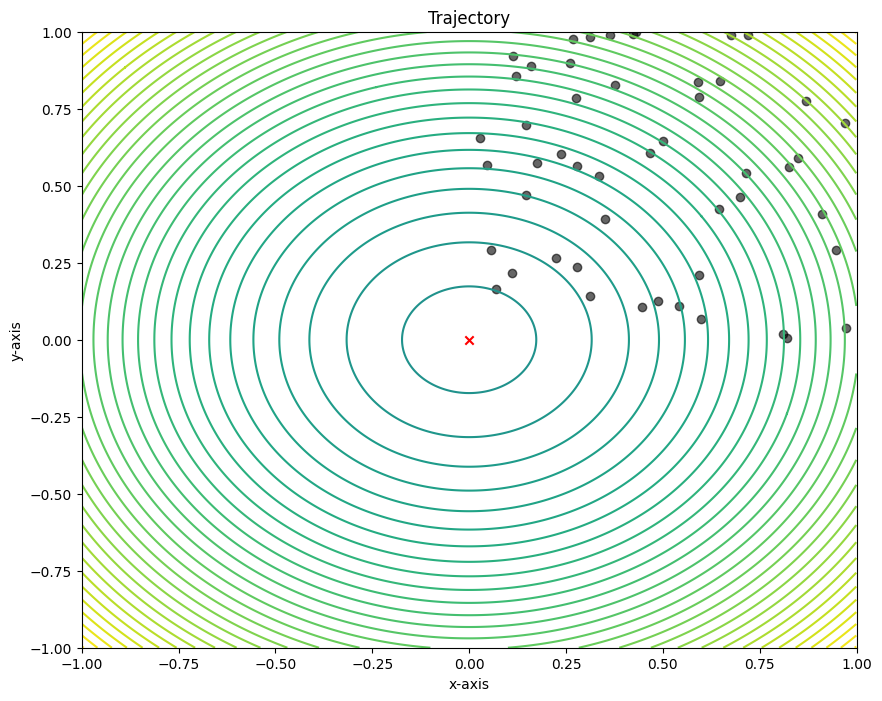

In [3]:
#conda install -c conda-forge ffmpeg

# Plot the sphere function's mesh for better plots
m = Mesher(func=fx.sphere, limits=[(-1,1), (-1,1)])
# Adjust figure limits
d = Designer(limits=[(-1,1), (-1,1), (-0.1,1)], label=['x-axis', 'y-axis', 'z-axis'])

animation = plot_contour(pos_history=optimizer.pos_history, mesher=m, designer=d, mark=(0,0))
# animation.save('solution.gif', writer='imagemagick', fps=10)

In [4]:
# rendering the animation
Image(url='solution.gif')

## scikit-opt example
Swarm Intelligence in Python (Genetic Algorithm, Particle Swarm Optimization, Simulated Annealing, Ant Colony Algorithm, Immune Algorithm,Artificial Fish Swarm Algorithm in Python)

In [5]:
# !pip install scikit-opt

2023-02-03 21:04:03,832 - numexpr.utils - INFO - NumExpr defaulting to 8 threads.


best_x: [ 89.535392   -72.25661841] best_y -0.9999999999194409


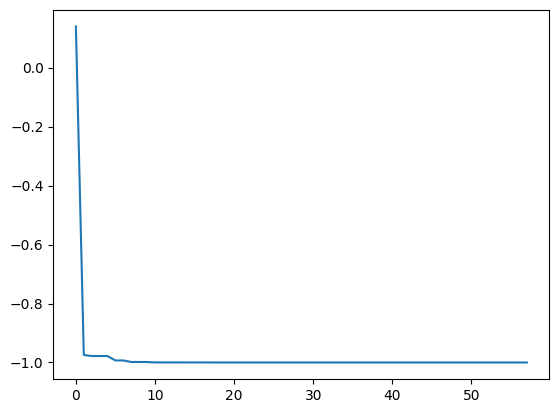

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sko.SA import SA

# define a multimodal function
obj_func = lambda x: np.sin(x[0]) * np.cos(x[1])

# solve using SA
sa = SA(func=obj_func, x0=np.array([-3, -3]), T_max=1, T_min=1e-9, L=300, max_stay_counter=150)
best_x, best_y = sa.run()
print('best_x:', best_x, 'best_y', best_y)

# print the result
plt.plot(pd.DataFrame(sa.best_y_history).cummin(axis=0))
plt.show()

# Travelling Salesman Problem (TSP)

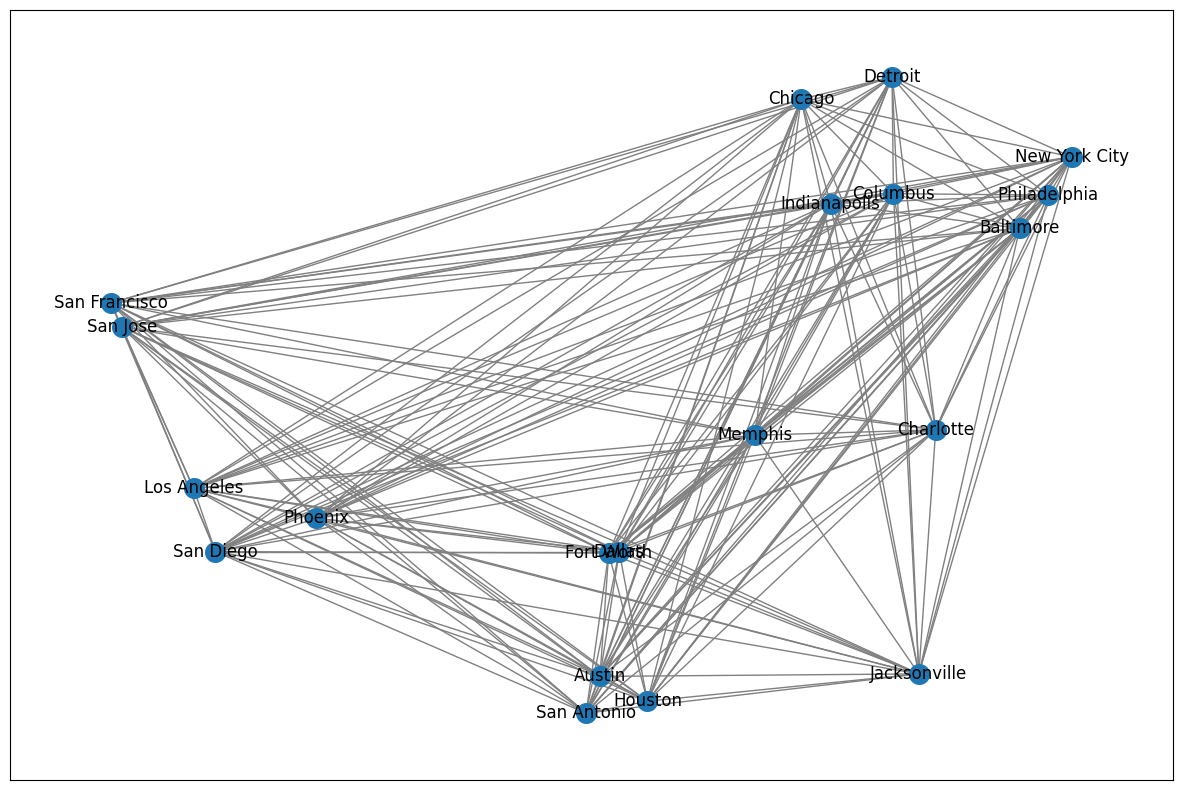

In [7]:
# Define the TSP problem
import networkx as nx
from collections import defaultdict
from haversine import haversine
# latitude and longitude for the twenty largest U.S. cities
cities = {
    'New York City': (40.72, -74.00),
    'Los Angeles': (34.05, -118.25),
    'Chicago': (41.88, -87.63),
    'Houston': (29.77, -95.38),
    'Phoenix': (33.45, -112.07),
    'Philadelphia': (39.95, -75.17),
    'San Antonio': (29.53, -98.47),
    'Dallas': (32.78, -96.80),
    'San Diego': (32.78, -117.15),
    'San Jose': (37.30, -121.87),
    'Detroit': (42.33, -83.05),
    'San Francisco': (37.78, -122.42),
    'Jacksonville': (30.32, -81.70),
    'Indianapolis': (39.78, -86.15),
    'Austin': (30.27, -97.77),
    'Columbus': (39.98, -82.98),
    'Fort Worth': (32.75, -97.33),
    'Charlotte': (35.23, -80.85),
    'Memphis': (35.12, -89.97),
    'Baltimore': (39.28, -76.62)
}


# create a haversine distance matrix based on latitude-longitude coordinates
distance_matrix = defaultdict(dict)
for ka, va in cities.items():
    for kb, vb in cities.items():
        distance_matrix[ka][kb] = 0.0 if kb == ka else haversine((va[0], va[1]), (vb[0], vb[1])) 
        

# convert distance diccionary into a dataframe        
distances = pd.DataFrame(distance_matrix)
city_names=list(distances.columns)
distances=distances.values

# Visualize the cities and then route

# Create a graph
G=nx.Graph()

for ka, va in cities.items():
    for kb, vb in cities.items():
        G.add_weighted_edges_from({(ka,kb, distance_matrix[ka][kb])})
        G.remove_edges_from(nx.selfloop_edges(G))
        
fig, ax = plt.subplots(figsize=(15,10))

# reverse lat and long for correct visualization
reversed_dict = {key: value[::-1] for key, value in cities.items()}

# Create an independent shallow copy of the graph and attributes
H = G.copy()

 
# Draw the network
ax=nx.draw_networkx(
    H,
    pos=reversed_dict,
    with_labels=True,
    edge_color="gray",
    node_size=200,
    width=1,
)

plt.show()

## Solving TSP using scikit-opt

In [8]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sko.PSO import PSO_TSP

num_points = len(city_names)
points_coordinate = city_names
pairwise_distances = distances

# The objective function. input routine, return total distance.
def cal_total_distance(routine):
    num_points, = routine.shape
    return sum([pairwise_distances[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)])

# solving the problem using PSO
pso_tsp = PSO_TSP(func=cal_total_distance, n_dim=num_points, size_pop=200, max_iter=800, w=0.8, c1=0.1, c2=0.1)
best_points, best_distance = pso_tsp.run()
best_points_ = np.concatenate([best_points, [best_points[0]]])

print('best_distance', best_distance)
print('route', best_points_)

best_distance [11005.17084165]
route [16  7 18 13  2 10 15  0  5 19 17 12  3 14  6  4  8  1  9 11 16]


## Solving TSP using simulated annealing implemented in networkx

NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks

In [9]:
# !pip install networkx
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import approximation as approx

# Create a graph
graph=nx.Graph()

# add weighted edges to the graph and remove selfloop edges
for i in range(len(city_names)):
    for j in range(1,len(city_names)):
        graph.add_weighted_edges_from({(city_names[i], city_names[j], distances[i][j])})
        graph.remove_edges_from(nx.selfloop_edges(graph))
        
# solve TSP using simulated annealing
cycle = approx.simulated_annealing_tsp(graph, "greedy", source=city_names[0])
edge_list = list(nx.utils.pairwise(cycle))
cost = sum(graph[n][nbr]["weight"] for n, nbr in nx.utils.pairwise(cycle))

print("The route of the salesman is:", cycle, "with cost of ", cost)        

The route of the salesman is: ['New York City', 'Philadelphia', 'Baltimore', 'Columbus', 'Detroit', 'Chicago', 'Indianapolis', 'Memphis', 'Dallas', 'Fort Worth', 'Austin', 'San Antonio', 'Houston', 'Jacksonville', 'Charlotte', 'Phoenix', 'San Diego', 'Los Angeles', 'San Jose', 'San Francisco', 'New York City'] with cost of  13839.700172135152


# Solving TSP using Pants

A Python3 implementation of the Ant Colony Optimization Meta-Heuristic

In [10]:
# !pip install ACO-Pants
import pants

nodes = []
for position in cities:
  nodes.append(position)

def euclidean(a, b):
  return distance_matrix.get(a).get(b)

world = pants.World(nodes, euclidean)

solver = pants.Solver()

solution = solver.solve(world)


print("Best solution:")
print("  - Fitness: ", solution.distance)
print("  - Route: ", solution.tour)    # Nodes visited in order

Best solution:
  - Fitness:  11466.091623091888
  - Route:  ['Chicago', 'Indianapolis', 'Columbus', 'Detroit', 'Baltimore', 'Philadelphia', 'New York City', 'Charlotte', 'Jacksonville', 'Memphis', 'Austin', 'San Antonio', 'Houston', 'Fort Worth', 'Dallas', 'Phoenix', 'San Diego', 'Los Angeles', 'San Francisco', 'San Jose']


## Solving TSP using deap

DEAP (Distributed Evolutionary Algorithms in Pytho) is a novel evolutionary computation framework for rapid prototyping and testing of ideas. 

In [11]:
# !pip install deap
from deap import base, creator, tools, algorithms
import random
import numpy as np

# Create a fitness function that minimizes the total distance
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

# Create the genetic operator functions
toolbox = base.Toolbox()
toolbox.register("permutation", random.sample, range(len(city_names)), len(city_names))
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.permutation)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def eval_tsp(individual):
    total_distance = 0
    for i in range(len(individual)):
        city_1 = individual[i]
        city_2 = individual[(i + 1) % len(individual)]
        total_distance += distances[city_1][city_2]
    return total_distance,

toolbox.register("evaluate", eval_tsp)
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# Run the genetic algorithm
pop = toolbox.population(n=50)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)
stats.register("max", np.max)

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=50, 
                               stats=stats, halloffame=hof, verbose=True)

# Print the final solution
best_individual = hof[0]
print("Best solution:")
print("  - Fitness: ", eval_tsp(best_individual))
print("  - Route: ", [city_names[i] for i in best_individual])

gen	nevals	avg    	min    	max    
0  	50    	36597.3	26911.8	43895.9
1  	27    	33720.2	26911.8	41682.9
2  	32    	31817.8	25492.7	40543.1
3  	27    	29132.6	24838  	35995  
4  	23    	27626.3	21648.5	34540.2
5  	33    	27682  	23379.9	38723.3
6  	28    	26569.6	22320.7	35244.5
7  	29    	25736.2	21980.7	43322.3
8  	32    	24714.1	19387.8	38170.7
9  	33    	24181  	19738  	35834.3
10 	27    	22723.7	18138.8	29714.3
11 	30    	21528.7	18138.8	28464  
12 	27    	20846.4	18138.8	32017.8
13 	33    	20579.4	14811.6	30272.8
14 	24    	20484.5	18138.8	32391.2
15 	36    	20232.6	17892.7	26860.4
16 	25    	19467.3	17892.7	31750.5
17 	23    	19093.1	17892.7	31719.7
18 	25    	19051.2	17679.7	31473.6
19 	26    	18480.5	15159.6	28381.5
20 	26    	18712  	15159.6	29239.3
21 	27    	18717.6	15159.6	31027.6
22 	31    	17186.6	15159.6	28492.2
23 	31    	16734  	15159.6	34441.9
24 	25    	15745.4	15082.5	29118.3
25 	29    	16102.8	14942.8	25597.2
26 	22    	15727.3	14942.8	28197.6
27 	28    	16103.5	1

## Solving TSP using OR-Tools

Google OR-Tools is an open source software suite for optimization, tuned for tackling the world's toughest problems in vehicle routing, flows, integer and linear programming, and constraint programming.

In [12]:
# !pip install --upgrade --user ortools
import numpy as np
import matplotlib.pyplot as plt
from ortools.constraint_solver import pywrapcp
from ortools.constraint_solver import routing_enums_pb2

#convert float arrany into integer array for OR_Tools
distances2=np.asarray(distances, dtype = 'int')

# define problem data
data = {}
data['distances'] = distances2
data['num_vehicles'] = 1
data['depot'] = 0

# define the solver
manager = pywrapcp.RoutingIndexManager(len(data['distances']), data['num_vehicles'], data['depot'])
routing = pywrapcp.RoutingModel(manager)

def distance_callback(from_index, to_index):
    from_node = manager.IndexToNode(from_index)
    to_node = manager.IndexToNode(to_index)
    return data['distances'][from_node][to_node]

transit_callback_index = routing.RegisterTransitCallback(distance_callback)   

routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

search_parameters = pywrapcp.DefaultRoutingSearchParameters()
search_parameters.local_search_metaheuristic = (
    routing_enums_pb2.LocalSearchMetaheuristic.TABU_SEARCH) # GREEDY_DESCENT, SIMULATED_ANNEALING, GENERIC_TABU_SEARCH
search_parameters.time_limit.seconds = 30
search_parameters.log_search = True

# print the solution
def print_solution(manager, routing, solution):
    print('Objective: {} meters'.format(solution.ObjectiveValue()))
    index = routing.Start(0)
    plan_output = 'Route for vehicle 0:\n'
    route_distance = 0
    while not routing.IsEnd(index):
        plan_output += ' {} ->'.format(manager.IndexToNode(index))
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
    plan_output += ' {}\n'.format(manager.IndexToNode(index))
    print(plan_output)
    plan_output += 'Route distance: {}meters\n'.format(route_distance)

solution = routing.SolveWithParameters(search_parameters)
if solution:
    print_solution(manager, routing, solution)

Objective: 10996 meters
Route for vehicle 0:
 0 -> 5 -> 19 -> 17 -> 12 -> 3 -> 14 -> 6 -> 4 -> 8 -> 1 -> 9 -> 11 -> 16 -> 7 -> 18 -> 13 -> 2 -> 10 -> 15 -> 0



## Solving TSP using simanneal

simanneal is a Python module to perform simulated annealing optimization to find the optimal state of a system. I

In [13]:
# !pip install simanneal 

#This code is from simanneal Python module
from __future__ import print_function
import math
import random
from simanneal import Annealer

class TravellingSalesmanProblem(Annealer):

    # pass extra data (the distance matrix) into the constructor
    def __init__(self, state, distance_matrix):
        self.distance_matrix = distance_matrix
        super(TravellingSalesmanProblem, self).__init__(state) 

    def move(self):
        """Swaps two cities in the route."""
        # no efficiency gain, just proof of concept
        # demonstrates returning the delta energy (optional)
        initial_energy = self.energy()

        a = random.randint(0, len(self.state) - 1)
        b = random.randint(0, len(self.state) - 1)
        self.state[a], self.state[b] = self.state[b], self.state[a]

        return self.energy() - initial_energy

    def energy(self):
        """Calculates the length of the route."""
        e = 0
        for i in range(len(self.state)):
            e += self.distance_matrix[self.state[i-1]][self.state[i]]
        return e
    
# initial state, a randomly-ordered itinerary
init_state = list(cities)
random.shuffle(init_state)

tsp = TravellingSalesmanProblem(init_state, distance_matrix)
tsp.set_schedule(tsp.auto(minutes=0.2))
# since our state is just a list, slice is the fastest way to copy
tsp.copy_strategy = "slice"
state, e = tsp.anneal()

while state[0] != 'New York City':
    state = state[1:] + state[:1]  # rotate NYC to start

print()
print("%i mile route:" % e)
print(" ➞  ".join(state))

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.60000      11071.80     4.80%     0.00%     0:00:05    -1:59:59 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.60000      10934.80     4.87%     0.00%     0:00:05     0:00:00


10934 mile route:
New York City ➞  Philadelphia ➞  Baltimore ➞  Charlotte ➞  Jacksonville ➞  Memphis ➞  Dallas ➞  Fort Worth ➞  Houston ➞  Austin ➞  San Antonio ➞  Phoenix ➞  San Diego ➞  Los Angeles ➞  San Jose ➞  San Francisco ➞  Chicago ➞  Indianapolis ➞  Columbus ➞  Detroit


## # Visualize the cities and then route

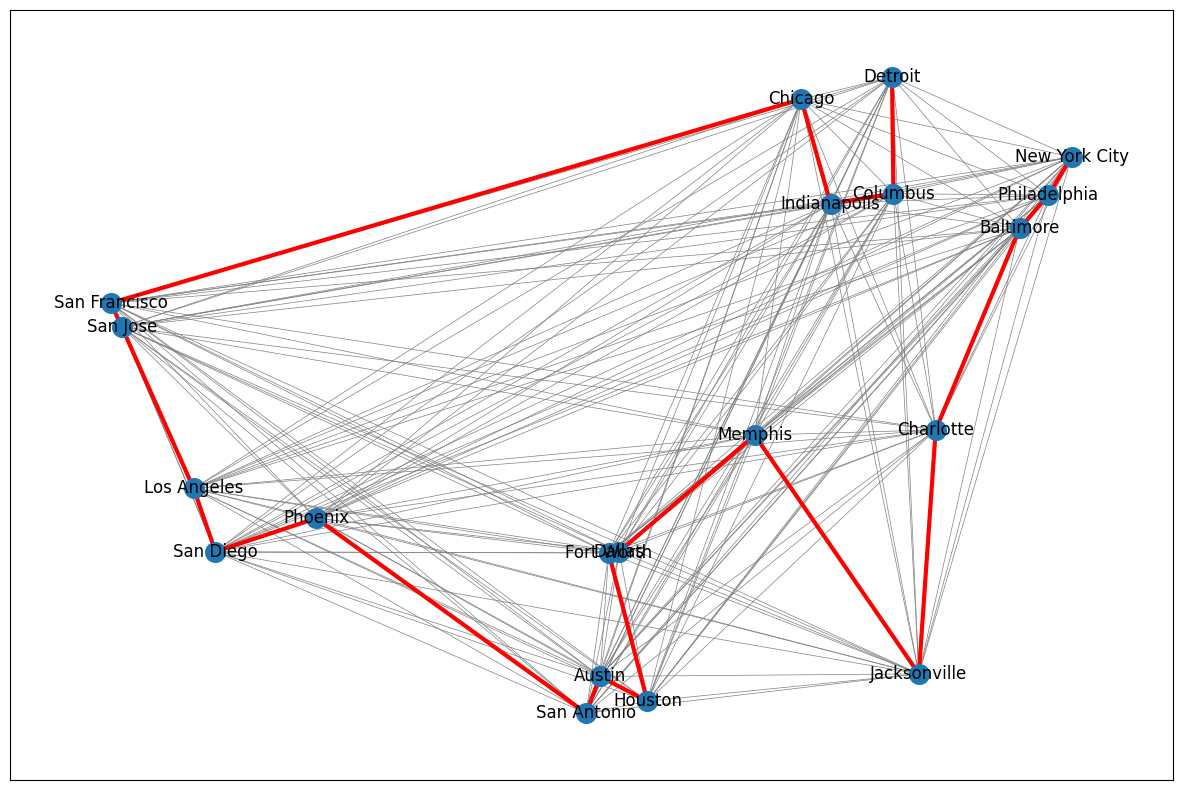

In [14]:
fig, ax = plt.subplots(figsize=(15,10))

# reverse lat and long for correct visualization
reversed_dict = {key: value[::-1] for key, value in cities.items()}

# Create an independent shallow copy of the graph and attributes
H = G.copy()

edge_list = list(nx.utils.pairwise(state))

# Draw closest edges on each node only
nx.draw_networkx_edges(H, pos=reversed_dict, edge_color="gray", width=0.5)

# Draw the route
ax=nx.draw_networkx(
    H,
    pos=reversed_dict,
    with_labels=True,
    edgelist=edge_list,
    edge_color="red",
    node_size=200,
    width=3,
)

plt.show()
# plt.savefig('A1_F04_TSP_Soln.png', format='png', dpi=300)